# Logging and exception handling

* Generalmente, a pesar de una fase cuidadosa de desarrollo, nuestros programas tendrán bugs.
* Una buena práctica consiste en agregar una bitácora -archivo de registro- (logs files) para monitorear en qué parte del programa sucedió el problema.

## Monitoreo con logging

* Lo más frustrante en el desarrollo de software bien podría ser depurar un problema que no se puede reproducir.
* El problema puede tener varias causas.
* Cuando se presenta algún problema en un módulo específico del programa, podemos extraer información de un log file, lo cual podría reducir el tiempo para resolver el problema.
* En Python podemos utilizar el objeto <code>Logger</code> para monitorear los eventos del programa. 
* La clase <code>Logger</code> pertenece al módulo <code>logging</code>.


## Uso de archivos para almacenar eventos de la aplicación

Supongamos que queremos hacer una bitácora cuando un usuario crea una tarea en la aplicación.

In [ ]:
class Task:
    def __init__(self, title):
        self.title = title
 
    def remove_from_db(self):
        # operaciones para eliminar la tarea de la base de datos
        task_removed = True
        return task_removed
 
task = Task("Limpia")

if task.remove_from_db():
    print(f"Tarea '{task.title}' eliminada de la base de datos")

**Problema : monitorear la aplicación con prints funciona para la fase de desarrollo pero no cuando se lanza la aplicación a proucción.**

* Cuando se almacenan eventos en un archivo, es posible examinarlos tantas veces como se desee, de manera que es un enfoque sostenible. 
* Por el contrario, al realizar el monitoreo mediante prints los eventos se envían a la consola y al cerrar la consola se pierde la información registrada.



* Para registrar eventos en un archivo, debemos proporcionar una configuración específica al **logger** (registrador) mediante la configuración de un **handler**.
* El módulo <code>logging</code> incluye una clase llamada <code>FileHandler</code> mediante la cual especificamos un archivo en el que el logger debe guardar los eventos. 

In [ ]:
import logging 

# Instanciamos el objeto logger
logger = logging.getLogger("task_app")

# Especificamos el archivo handler
file_handler = logging.FileHandler("taskier.log")

# Añadimos el handler al logger
logger.addHandler(file_handler)    

Ahora que el logger sabe dónde guardar los registros, estamos listos para comprobar cómo funciona el registro:

In [ ]:
task = Task("Limpia")
if task.remove_from_db():
    logger.warning(f"Tarea '{task.title}' eliminada de la base de datos")

Si abrimos el archivo <code>taskier.log</code>, podemos ver el registro. 

## ¿Cómo guardo los registros correctamente en el log file?

* Dependiendo del tamaño de la aplicación, durante un período prolongado de tiempo, el log file puede acumular muchos registros, de la magnitud de miles o millones.

* Sin embargo, para una aplicación de administración de tareas, puede esperar ver algunos registros como este:
  * <code>-- app is starting</code>
  * <code>-- created a new task Laundry</code>
  * <code>-- removed the task from the database</code>
  * <code>-- successfully changed the tags for the task</code>
  * <code>-- updated the task's status to completed</code>
  * <code>-- FAILED to change the task's status!!!</code>
  

* Podemos categorizar y formatear los log files para incluir más información, haciendo que nuestra experiencia de depuración (debugging) sea menos dolorosa.

### Categorización de eventos de aplicaciones con niveles

* No todos los problemas de software tienen el mismo nivel de prioridad. 
* Algunos problemas deben solucionarse **ahora**, mientras que otros pueden esperar. 
* Podemos aplicar la misma lógica a nuestro sistema de monitoreo. 
* Al utilizar diferentes niveles de registro, podemos resaltar la urgencia/importancia de los problemas.
* En el módulo <code>logging</code> de Python tenemos acceso a 5 niveles de registro:
  * <code>DEBUG</code>
  * <code>INFO</code>
  * <code>WARNING</code>
  * <code>ERROR</code>
  * <code>CRITICAL</code>

* La siguiente figura ordena estos niveles de acuerdo al nivel de gravedad y las pautas generales sobre qué registros deben capturarse en cada nivel.

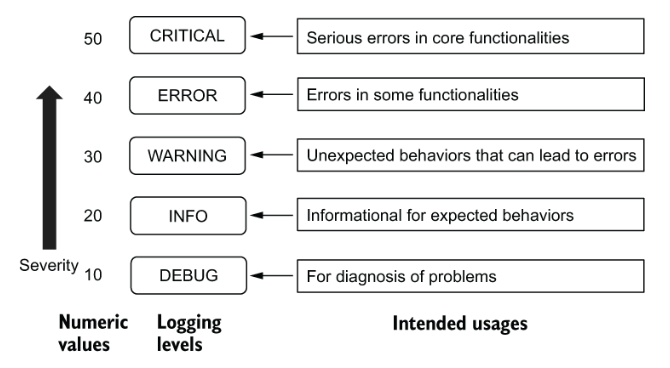

* El primer uso de los niveles es establecer el nivel de un logger. 
* Además del atributo de controladores de archivos, un registrador tiene un atributo importante llamado nivel.
* Cuando configuramos un nivel específico de un logger, como <code>INFO</code>, el logger capturará todos los registros al nivel de <code>INFO</code> o a niveles de gravedad superiores (es decir, <code>WARNING</code>, <code>ERROR</code> y <code>CRITICAL</code>).

In [ ]:
logger = logging.getLogger("task_app")
logger.setLevel(logging.WARNING)
 
print(logger.level, logging._levelToName[logger.level]) 

Con el logger configurado al nivel <code>WARNING</code>, se espera que el logger capture unicamente los mensajes de warning, errors y critical. 

In [ ]:
def logging_messages_all_levels():
    logger.critical("--Critical message")
    logger.error("--Error message")
    logger.warning("--Warning message")
    logger.info("--Info message")
    logger.debug("--Debug message")
 
logging_messages_all_levels()

def check_log_content(filename):
    with open(filename) as file:
        return file.read()
    
log_records = check_log_content("taskier.log")
print(log_records)




### Configuración de nivel el handler

* El otro uso de los niveles es establecer el nivel de un handler. 
* Cuando configuramos el nivel del logger, el nivel se aplica al nivel del logger, lo cual no siempre es deseable.
* Un logger puede tener varios handlers y podríamos aplicar diferentes niveles a estos handlers para que puedan guardar registros de eventos en sus niveles designados.


In [ ]:
# Configura el nivel del logger a DEBUG
logger.setLevel(logging.DEBUG)                  
 
handler_warning = logging.FileHandler("taskier_warning.log")
handler_warning.setLevel(logging.WARNING)       
# Agrega un manejador al nivel WARNING
logger.addHandler(handler_warning)
 
handler_critical = logging.FileHandler("taskier_critical.log")
handler_critical.setLevel(logging.CRITICAL)     
# Agrega un manejador al nivel CRITICAL
logger.addHandler(handler_critical)
 
logging_messages_all_levels()
 
warning_log_records = check_log_content("taskier_warning.log")
print(warning_log_records)

 
critical_log_records = check_log_content("taskier_critical.log")
print(critical_log_records)



### Configuración del formato de texto del handler

* Sin el formato de texto adecuado, es difícil localizar los problemas. 
* El objetivo de formatear los registros es resaltar la información clave en cada registro, como la hora del evento y el nivel del mensaje.


In [ ]:
import logging
 
logger = logging.getLogger("task_app")              
logger.setLevel(logging.DEBUG)                    
 
logger.handlers = []                              
 
formatter = logging.Formatter("%(asctime)s [%(levelname)s] - %(name)s - %(message)s")                       
 
stream_handler = logging.StreamHandler()
stream_handler.setLevel(logging.DEBUG)
stream_handler.setFormatter(formatter)            
logger.addHandler(stream_handler)
 
def log_some_records():
    logger.info("App is starting")
    logger.error("Failed to save the task to the db")
    logger.info("Created a task by the user")
    logger.critical("Can't update the status of the task")
 
log_some_records()
 